In [2]:
library(readr)

In [2]:
data1 = read.csv(file = "/home/tanvi/Downloads/1-6m-accidents-traffic-flow-over-16-years/accidents_2012_to_2014.csv")

data2 = read.csv(file = "/home/tanvi/Downloads/1-6m-accidents-traffic-flow-over-16-years/accidents_2009_to_2011.csv")

data <- rbind.data.frame(data1, data2)

In [6]:
#londonEN1 <- read_csv("/home/tanvi/Downloads/1-6m-accidents-traffic-flow-over-16-years/accidents_2009_to_2011.csv",
#                      col_types = cols_only(Location_Easting_OSGR = col_guess(),
#                                            Location_Northing_OSGR = col_guess()))
#
#londonEN2 <- read_csv("/home/tanvi/Downloads/1-6m-accidents-traffic-flow-over-16-years/accidents_2012_to_2014.csv",
 #                     col_types = cols_only(Location_Easting_OSGR = col_guess(),
 #                                           Location_Northing_OSGR = col_guess()))
#
#londonEN <- rbind.data.frame(londonEN1,londonEN2)

londonEN1 <- read_csv("accidents_london_2012_2014")
londonEN = rbind.data.frame(londonEN1)


Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  Location_Easting_OSGR = col_integer(),
  Location_Northing_OSGR = col_integer(),
  Longitude = col_double(),
  Latitude = col_double(),
  Police_Force = col_integer(),
  Accident_Severity = col_integer(),
  Number_of_Vehicles = col_integer(),
  Number_of_Casualties = col_integer(),
  Day_of_Week = col_integer(),
  Time = col_time(format = ""),
  `Local_Authority_(District)` = col_integer(),
  `1st_Road_Class` = col_integer(),
  `1st_Road_Number` = col_integer(),
  Speed_limit = col_integer(),
  `2nd_Road_Class` = col_integer(),
  `2nd_Road_Number` = col_integer(),
  Urban_or_Rural_Area = col_integer(),
  Year = col_integer()
)
See spec(...) for full column specifications.


In [7]:
install.packages("rgdal")

Warning message in install.packages("rgdal"):
“installation of package ‘rgdal’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
for( i in 2:ncol(data) ) {
  if( class(data[[i]]) == "character" ) {
    data[[i]] <- as.factor(data[[i]])
  }
}

str(data)
names(data)

'data.frame':	934139 obs. of  33 variables:
 $ Accident_Index                             : Factor w/ 561394 levels "2.01E+100","2.01E+101",..: 184 185 186 187 188 189 190 191 192 193 ...
 $ Location_Easting_OSGR                      : int  527200 524930 525860 524980 526170 526090 527780 524010 527710 525120 ...
 $ Location_Northing_OSGR                     : int  178760 181430 178080 181030 179200 177600 179680 182080 179290 180060 ...
 $ Longitude                                  : num  -0.169 -0.201 -0.189 -0.2 -0.184 ...
 $ Latitude                                   : num  51.5 51.5 51.5 51.5 51.5 ...
 $ Police_Force                               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Accident_Severity                          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Number_of_Vehicles                         : int  2 2 2 1 1 2 1 2 2 2 ...
 $ Number_of_Casualties                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date                                       : Factor w/ 2191 levels "01/01/2

[1] "Accident_Index"                             
 [2] "Location_Easting_OSGR"                      
 [3] "Location_Northing_OSGR"                     
 [4] "Longitude"                                  
 [5] "Latitude"                                   
 [6] "Police_Force"                               
 [7] "Accident_Severity"                          
 [8] "Number_of_Vehicles"                         
 [9] "Number_of_Casualties"                       
[10] "Date"                                       
[11] "Day_of_Week"                                
[12] "Time"                                       
[13] "Local_Authority_.District."                 
[14] "Local_Authority_.Highway."                  
[15] "X1st_Road_Class"                            
[16] "X1st_Road_Number"                           
[17] "Road_Type"                                  
[18] "Speed_limit"                                
[19] "Junction_Detail"                            
[20] "Junction_Control"                           
[21] "X2nd_Road_Class"                            
[22] "X2nd_Road_Number"                           
[23] "Pedestrian_Crossing.Human_Control"          
[24] "Pedestrian_Crossing.Physical_Facilities"    
[25] "Light_Conditions"                           
[26] "Weather_Conditions"                         
[27] "Road_Surface_Conditions"                    
[28] "Special_Conditions_at_Site"                 
[29] "Carriageway_Hazards"                        
[30] "Urban_or_Rural_Area"                        
[31] "Did_Police_Officer_Attend_Scene_of_Accident"
[32] "LSOA_of_Accident_Location"                  
[33] "Year"

In [6]:
pca_data <- data[c(2,3,4,5,11,22,23)]
pca_data[[6]] <- as.integer(pca_data[[6]])
pca_data[[7]] <- as.integer(pca_data[[7]])

In [7]:
install.packages("mice")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:

library(mice) 

summary(pca_data)
pca_data_imputed <- complete(mice(pca_data))

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind



ERROR: Error in summary(pca_data): object 'pca_data' not found


Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6      PC7
Standard deviation     1.6973 1.0619 1.0001 0.9980 0.9973 0.02395 0.004469
Proportion of Variance 0.4116 0.1611 0.1429 0.1423 0.1421 0.00008 0.000000
Cumulative Proportion  0.4116 0.5726 0.7155 0.8578 0.9999 1.00000 1.000000

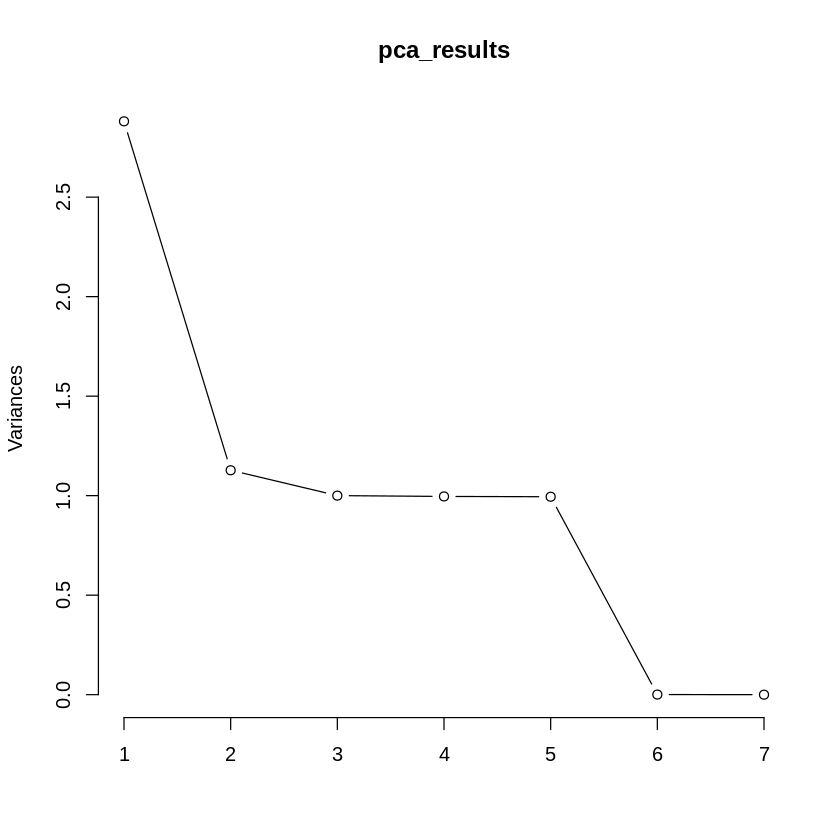

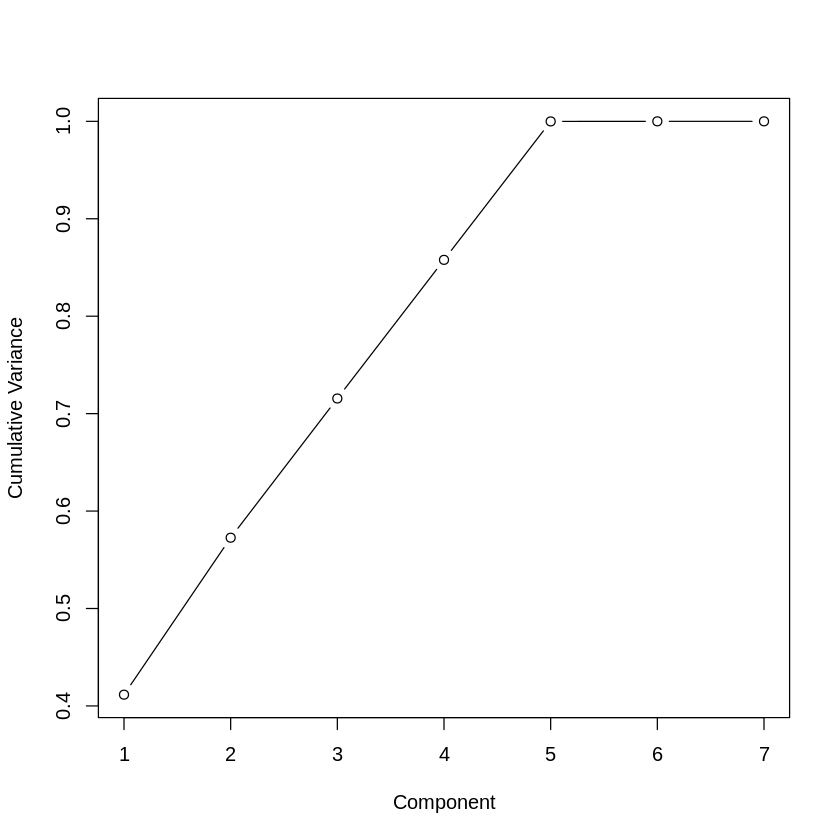

In [9]:
pca_results <- prcomp(pca_data_imputed, scale. = T)

summary(pca_results)
plot(pca_results,type='l')

plot((summary(pca_results))$importance[3,],type='b',
xlab = "Component", ylab = "Cumulative Variance")

In [10]:
data[-c(names(pca_data))]

ERROR: Error in -c(names(pca_data)): invalid argument to unary operator


In [13]:
scaled_pca_data <- scale(pca_data_imputed[c(1,2,3,5)])

db <- dbscan(scaled_pca_data, eps = 2, MinPts = 300)

unique(db$cluster)

table(db$cluster,pca_data[[7]])

ERROR: Error in scale(pca_data_imputed[c(1, 2, 3, 5)]): object 'pca_data_imputed' not found
